In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv('ExpenditureAndDefaultDatabase.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
#Create dummy variables
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


In [4]:
#Descriptive statistics
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967,0.775588,0.440485,0.068992
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812,0.417353,0.496634,0.253536
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000,1.000000,0.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000


<Axes: >

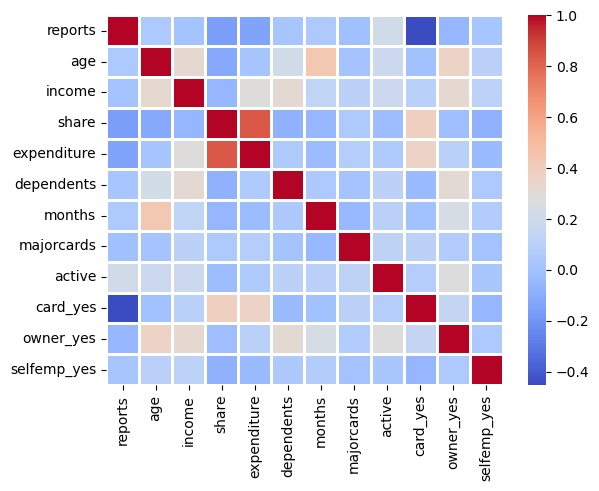

In [5]:
#Data correlation
sns.heatmap(df.corr(), cmap='coolwarm', linecolor='white', linewidths=1)

In [6]:
#Assign values
y = df['card_yes']
x = df.drop(columns='card_yes')

In [7]:
#Training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1502)

In [8]:
#Parameter tuning
# Parameter grid
from sklearn.model_selection import ParameterGrid
params = {'n_estimators':range(50, 500, 50)}
grid = ParameterGrid(params)
# List where to store accuracy
f1score = []
# Loop
for params in grid:
    #Random forest model
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=params['n_estimators'])
    model.fit(x_train, y_train)
    #Predictions
    y_pred = model.predict(x_test)
    #Store f1score
    from sklearn.metrics import f1_score
    f1 = f1_score(y_test, y_pred)
    f1score.append(f1)

In [10]:
#Best parameter
grid[np.argmax(f1score)]

{'n_estimators': 50}